In [16]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import rcParams
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [17]:
rcParams['figure.figsize'] = 20,10
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('Train_Cientifico_datos.csv', delimiter=';')
df = df.head(569)

### Procesamiento y tratamiento de datos

In [19]:
# Revisamos los vacios
df_null = df.isnull().sum().reset_index()
df_null[df_null[0] > 0]

,index,0


In [20]:
# Nos aseguramos que todas las columnas sean de tipo numerico
df_types = df.dtypes.reset_index()
df_types_convert = df_types[(df_types[0] != 'float64') & (df_types[0] != 'int64')]
df_types_convert

,index,0


### Analisis Descriptivos de las variables de entrada

In [37]:
df_analisis = df.describe().T
df_analisis['difference'] = df_analisis['max'] - df_analisis['min']
df_analisis['corr_objective'] = df.corr()['malignant']
df_analisis.drop(axis=1, columns=['count','25%','50%','75%'], inplace=True)
df_analisis

,mean,std,min,max,difference,corr_objective
mean radius,14.127292,3.524049,6.981,28.11,21.129,-0.730029
mean texture,19.289649,4.301036,9.710,39.28,29.570,-0.415185
mean perimeter,91.969033,24.298981,43.790,188.50,144.710,-0.742636
mean area,654.889104,351.914129,143.500,2501.00,2357.500,-0.708984
mean smoothness,53.418260,192.691499,0.100,997.00,996.900,-0.055123
mean compactness,28.886329,117.510703,0.060,958.00,957.940,0.100487
mean concavity,40.974640,142.131570,0.000,973.00,973.000,0.025766
mean concave points,36.058367,123.109612,0.000,974.00,974.000,-0.041412
mean symmetry,18.432831,53.388748,0.180,304.00,303.820,0.076420
mean fractal dimension,64.298601,182.029228,0.060,898.00,897.940,0.009297


De estas metricas podemos destacar lo siguiente:
- Las variables Radius, Texture, Perimeter, Area son las que tienen una relación fuerte con la variable objetivo (> 0.7 or < -0.7), ademas, podemos ver que son las mismas que tienen una variabilidad baja, a diferencia del resto de variables (smoothness, compactness, concavity, symmetry, fractal dimension, concave points) que tienen valores entre 0 y 1000

   unique_values  counts  relative
0            1.0     357     62.74
1            0.0     212     37.26


Text(0, 0.5, 'Numero de observaciones')

<Figure size 864x720 with 0 Axes>

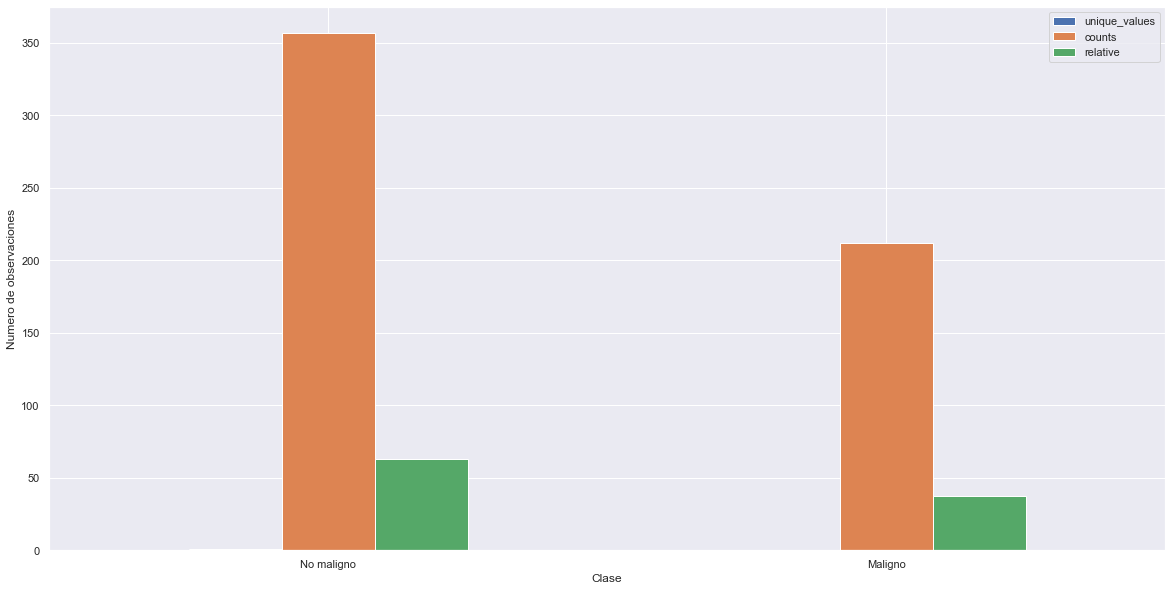

In [22]:
# Revisamos el balanceo de los datos objetivos
plt.figure(figsize=(12, 10))
df_objetiv = df['malignant'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df_objetiv['relative'] = round(df_objetiv['counts'] / df.shape[0] * 100, 2)
print(df_objetiv)
df_objetiv.plot(kind='bar', rot=0)
plt.xticks(range(2), ['No maligno', 'Maligno'])
plt.xlabel("Clase")
plt.ylabel("Numero de observaciones")

En este caso podemos considerar que hay un caso de desbalanceo de datos objetivo, ya que podemos ver que existe un 25% mas de datos de la clase 0 que de la clase 1, afectando esto el resultado de cualquier modelo, por lo que primero vamos a entrenar distintos modelos con los datos como vienen para tener un modelo base y luego tratar de mejorar su performance con distintas estrategias de regularización

Debido a la naturalidad de los datos, vamos a graficar el promedio y el peor caso de cada variable, y ver como se comporta en relación con la variable objetivo

<AxesSubplot:xlabel='worst symmetry', ylabel='mean symmetry'>

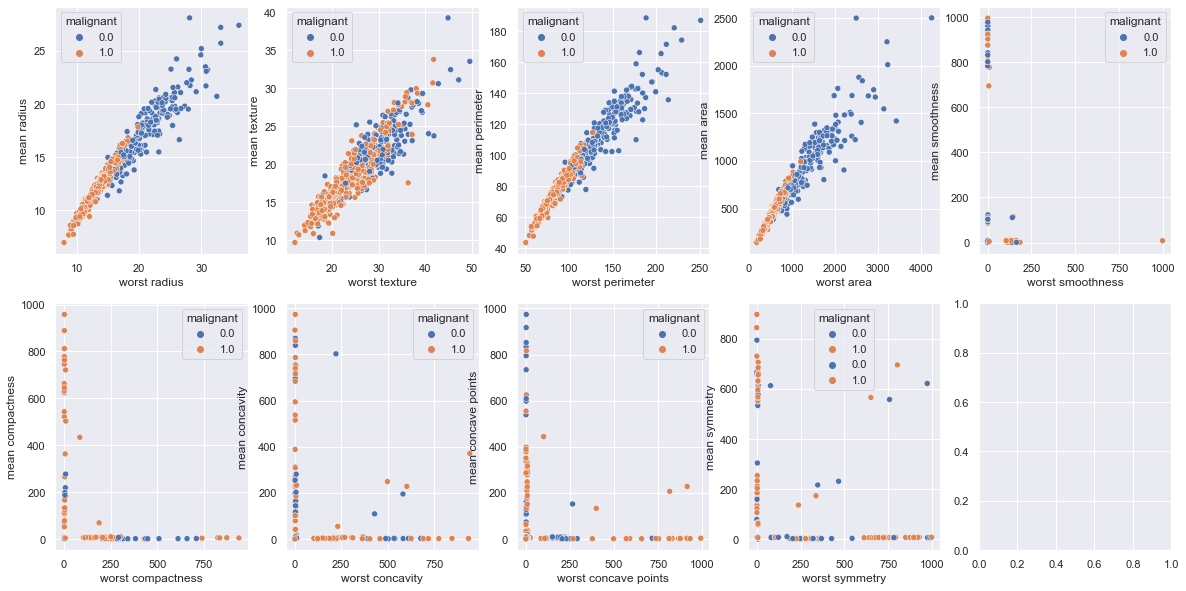

In [23]:
sns.set()
fig, axes = plt.subplots(2, 5)
sns.scatterplot(y="mean radius", x="worst radius", hue="malignant", data=df, ax=axes[0,0])
sns.scatterplot(y="mean texture", x="worst texture", hue="malignant", data=df, ax=axes[0,1])
sns.scatterplot(y="mean perimeter", x="worst perimeter", hue="malignant", data=df, ax=axes[0,2])
sns.scatterplot(y="mean area", x="worst area", hue="malignant", data=df, ax=axes[0,3])
sns.scatterplot(y="mean smoothness", x="worst smoothness", hue="malignant", data=df, ax=axes[0,4])
sns.scatterplot(y="mean compactness", x="worst compactness", hue="malignant", data=df, ax=axes[1,0])
sns.scatterplot(y="mean concavity", x="worst concavity", hue="malignant", data=df, ax=axes[1,1])
sns.scatterplot(y="mean concave points", x="worst concave points", hue="malignant", data=df, ax=axes[1,2])
sns.scatterplot(y="mean symmetry", x="worst symmetry", hue="malignant", data=df, ax=axes[1,3])
sns.scatterplot(y="mean fractal dimension", x="worst fractal dimension", hue="malignant", data=df, ax=axes[1,3])

<AxesSubplot:xlabel='malignant', ylabel='mean fractal dimension'>

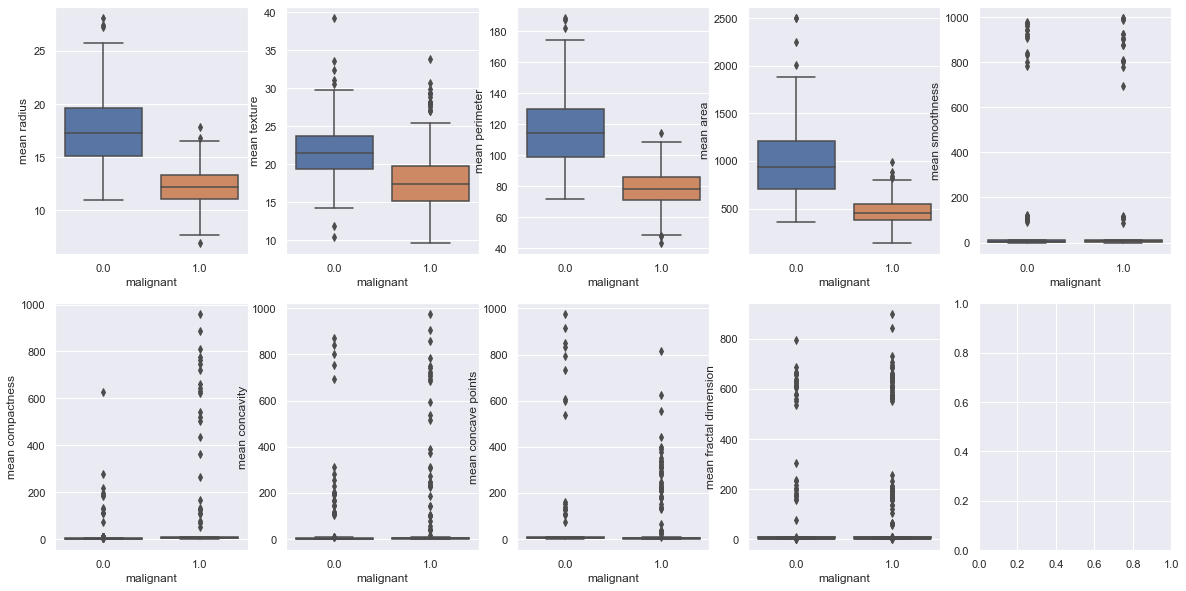

In [24]:
fig, axes = plt.subplots(2, 5)
sns.boxplot(y="mean radius", x="malignant", data=df, ax=axes[0,0])
sns.boxplot(y="mean texture", x="malignant", data=df, ax=axes[0,1])
sns.boxplot(y="mean perimeter", x="malignant", data=df, ax=axes[0,2])
sns.boxplot(y="mean area", x="malignant", data=df, ax=axes[0,3])
sns.boxplot(y="mean smoothness", x="malignant", data=df, ax=axes[0,4])
sns.boxplot(y="mean compactness", x="malignant", data=df, ax=axes[1,0])
sns.boxplot(y="mean concavity", x="malignant", data=df, ax=axes[1,1])
sns.boxplot(y="mean concave points", x="malignant", data=df, ax=axes[1,2])
sns.boxplot(y="mean symmetry", x="malignant", data=df, ax=axes[1,3])
sns.boxplot(y="mean fractal dimension", x="malignant", data=df, ax=axes[1,3])

De estas graficas podemos reforzar la hipotesis anterior, las variables smoothness, compactness, concavity, symmetry, fractal dimension, concave points tienen una alta variabilidad y poca correlación con la variable objetivo

Ademas, podemos darnos cuenta que para las variables radius, texture, perimeter y area existe el mismo comportamiento, a mayor valor, es mas probable que la variable objetivo sea de clase 0

In [25]:
def evaluate_models(X,Y):
    # 1 - preparar modelos
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    # Evaluar cada modelo usando la metrica de accuracy y la metodologia de kFolds, ademas de revisar su matriz de confusion y sus metricas mas importantes
    results = []
    names = []
    seed = 5
    scoring = 'roc_auc'
    name_model, mean_accuracy, mean_std = [], [], []
    df_results = pd.DataFrame()
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "Modelo %s" % (name)
        print(msg)
        name_model.append(name)
        mean_accuracy.append(cv_results.mean())
        mean_std.append(cv_results.std())
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Matriz de confusion
        matrix = plot_confusion_matrix(model, X_test, y_test)
        matrix.ax_.set_title('Matrix de confusion')
        plt.xlabel('Clase predicha')
        plt.ylabel('Clase verdadera')
        plt.show()
        # Reporte de clasificacion
        print("")
        print(classification_report(y_test, y_pred))
    # Dibujar el boxplot de cada algoritmo
    df_results['name'] = name_model
    df_results['roc_auc promedio'] = mean_accuracy
    df_results['Std Promedio'] = mean_std
    print('Resumen de los modelos')
    print(df_results)
    fig = plt.figure()
    fig.suptitle('Comparacion de algoritmos')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return df_results

In [26]:
# Tratamiento y transformacion de datos
def transform_data(df):
    X = df.iloc[:, 0:len(df.columns)-1]
    Y = df.iloc[:, len(df.columns)-1:]
    scaler = StandardScaler().fit(X.values)
    features = scaler.transform(X.values)
    scaled_features = pd.DataFrame(features, columns = X.columns)
    return scaled_features, Y

Para el entrenamiento y seleccion del modelo, se tomaron en cuenta las siguientes cosas:
- Debido a la alta variabilidad y diferencia en escala que manejan algunas variables, se utilizara la estrategia de normalización Standard Scaler
- Para comparar los modelos y revisar su performance, se utilizara la metrica **ROC AUC**, ya que es un problema de clasificacion binaria y existe un poco de desbalanceo en la data, ademas de que con esta se podrá revisar el rendimiento del modelo a la hora de distinguir entre las clases positiva y negativa.

Modelo LR


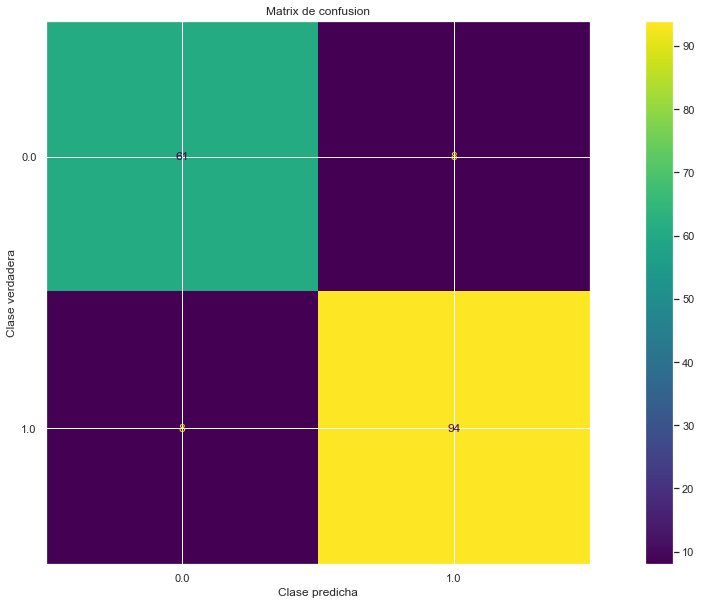


              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        69
         1.0       0.92      0.92      0.92       102

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Modelo LDA


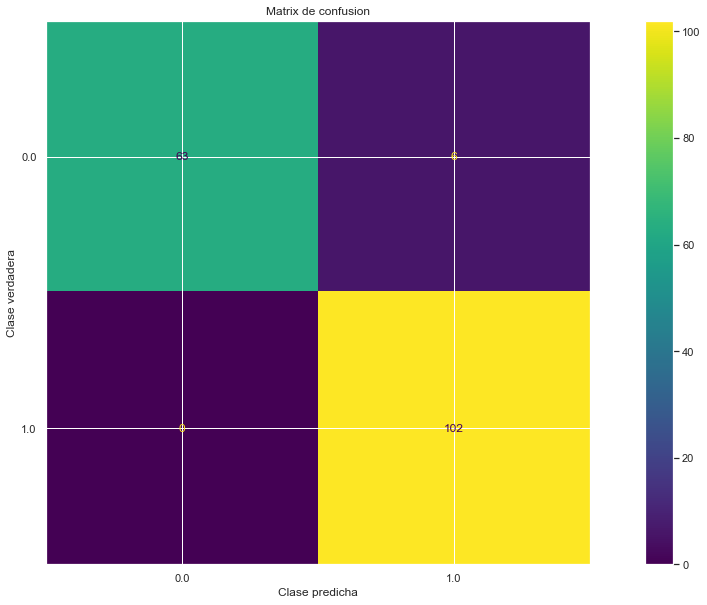


              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        69
         1.0       0.94      1.00      0.97       102

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Modelo KNN


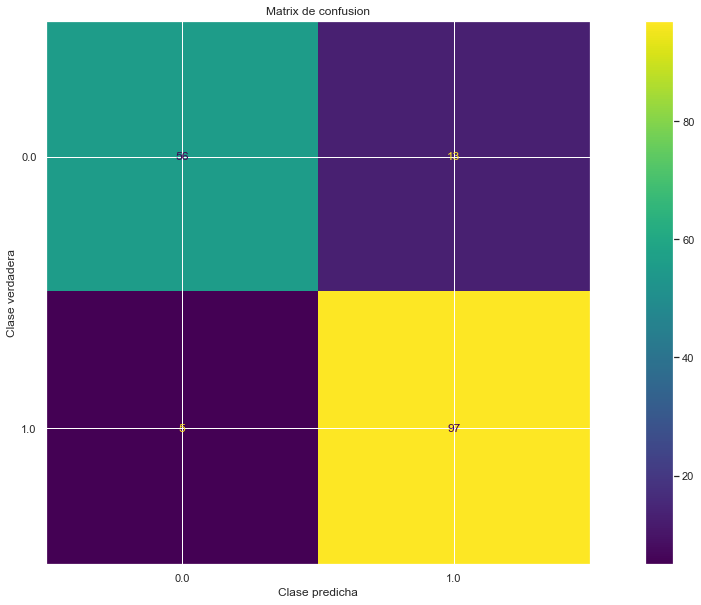


              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86        69
         1.0       0.88      0.95      0.92       102

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.89      0.89       171

Modelo DT


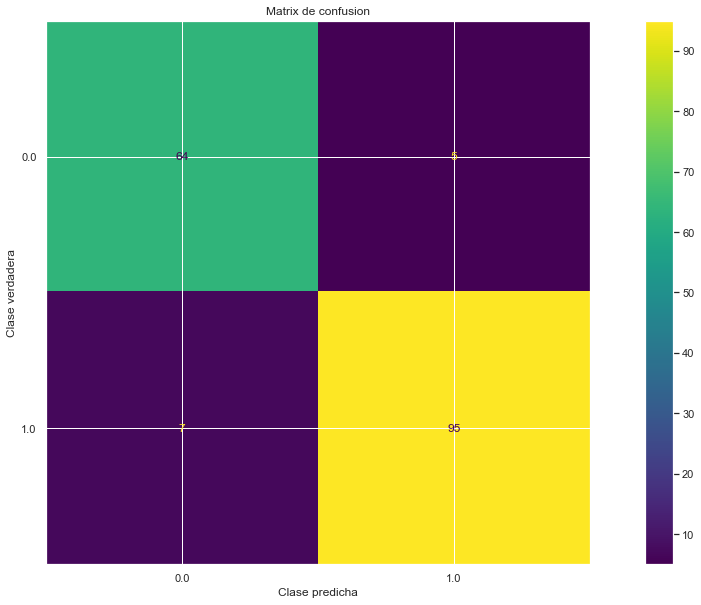


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        69
         1.0       0.95      0.93      0.94       102

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

Modelo NB


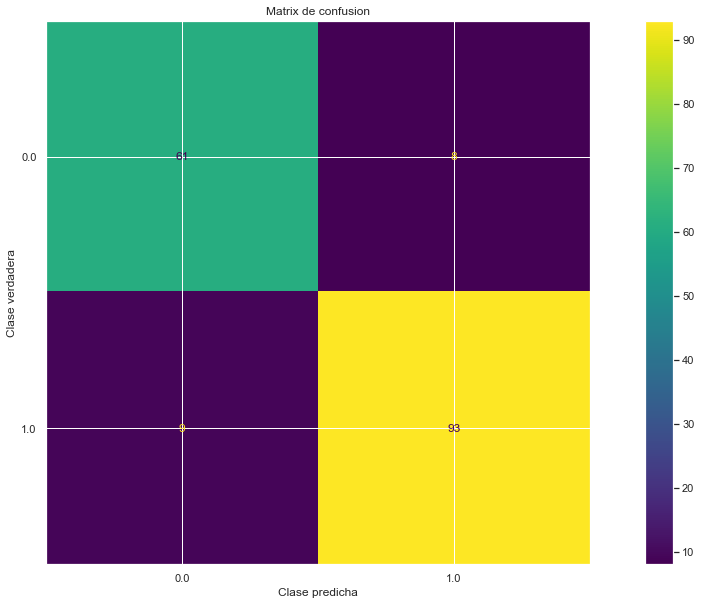


              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88        69
         1.0       0.92      0.91      0.92       102

    accuracy                           0.90       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.90      0.90      0.90       171

Modelo SVM


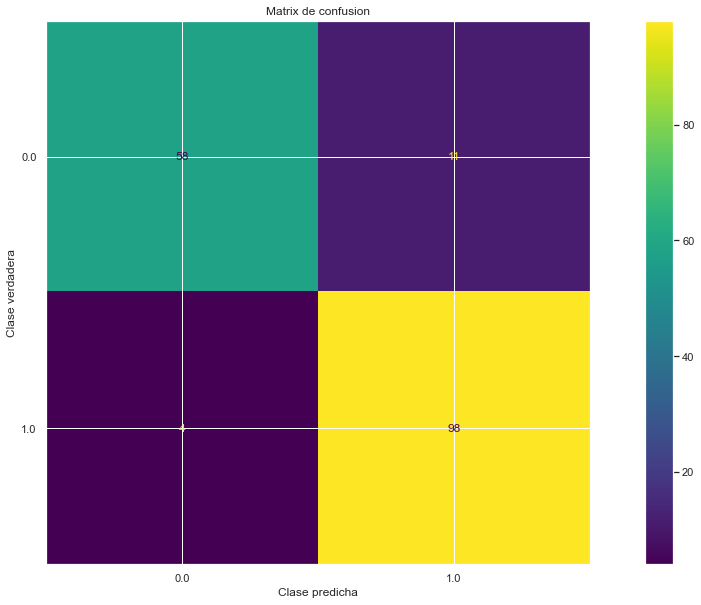


              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        69
         1.0       0.90      0.96      0.93       102

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171

Resumen de los modelos
  name  roc_auc promedio  Std Promedio
0   LR          0.982493      0.021792
1  LDA          0.982773      0.015401
2  KNN          0.953220      0.039513
3   DT          0.899955      0.019789
4   NB          0.953998      0.054580
5  SVM          0.981784      0.021437


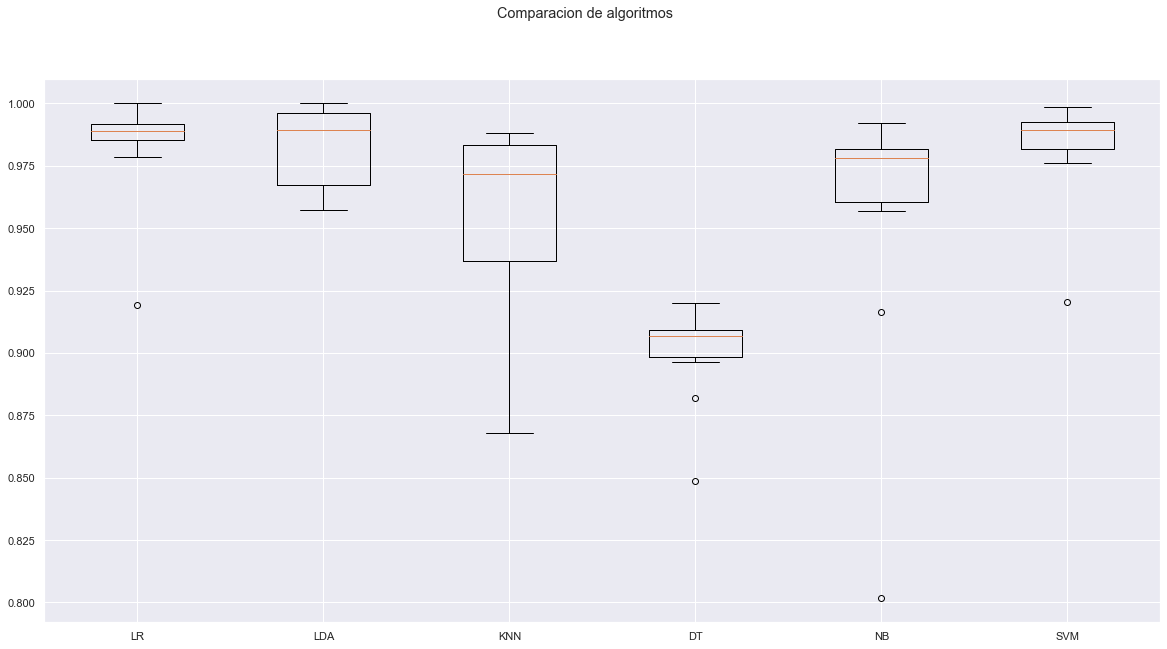

In [27]:
X, Y = transform_data(df)
df_results = evaluate_models(X,Y)

Modelo LR


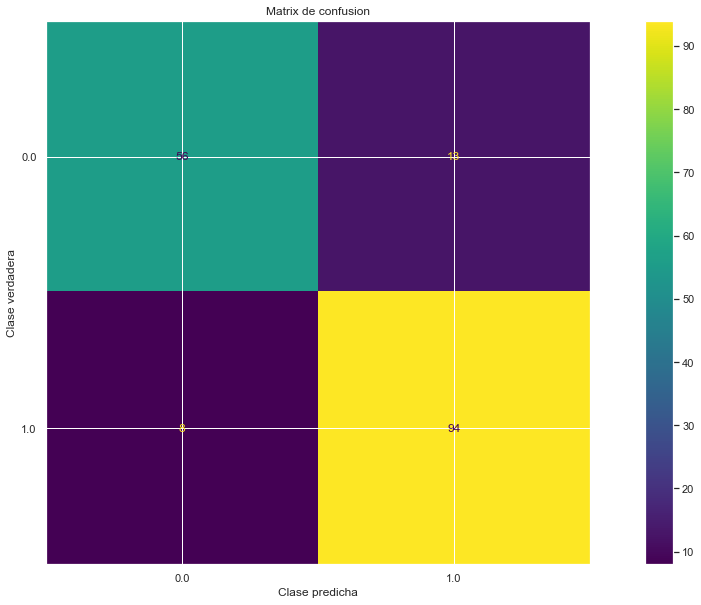


              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        69
         1.0       0.88      0.92      0.90       102

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171

Modelo LDA


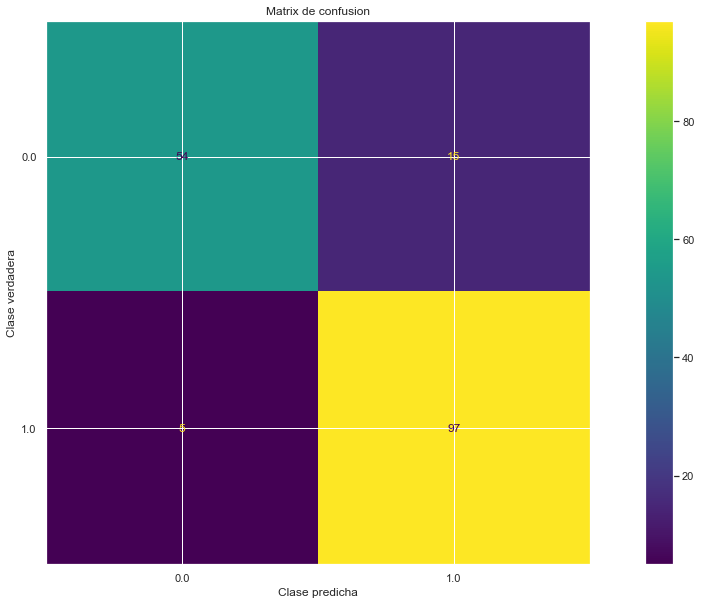


              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84        69
         1.0       0.87      0.95      0.91       102

    accuracy                           0.88       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.88      0.88       171

Modelo KNN


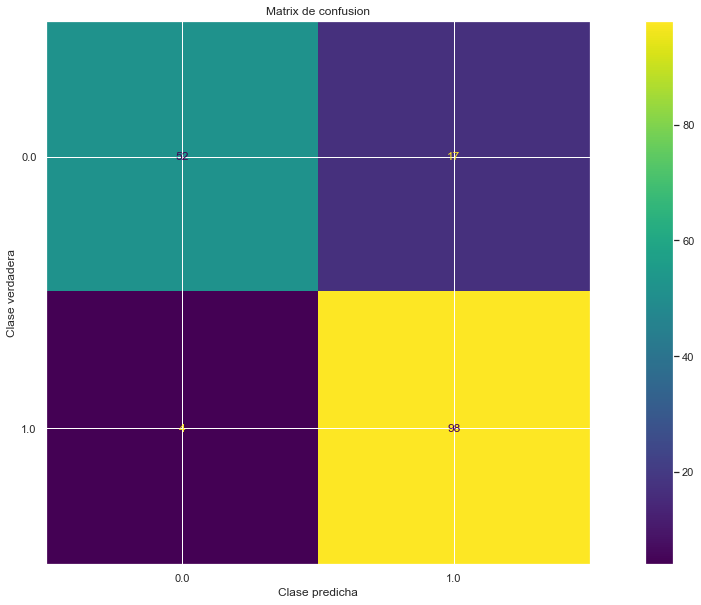


              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83        69
         1.0       0.85      0.96      0.90       102

    accuracy                           0.88       171
   macro avg       0.89      0.86      0.87       171
weighted avg       0.88      0.88      0.87       171

Modelo DT


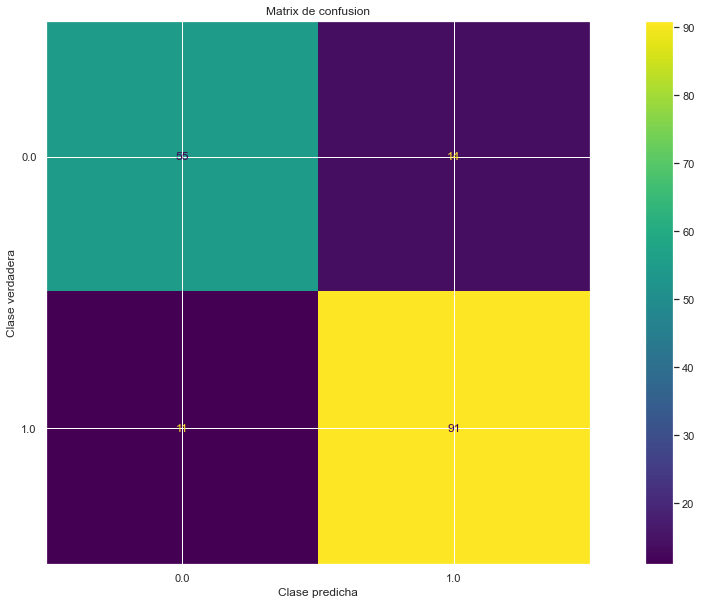


              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81        69
         1.0       0.87      0.89      0.88       102

    accuracy                           0.85       171
   macro avg       0.85      0.84      0.85       171
weighted avg       0.85      0.85      0.85       171

Modelo NB


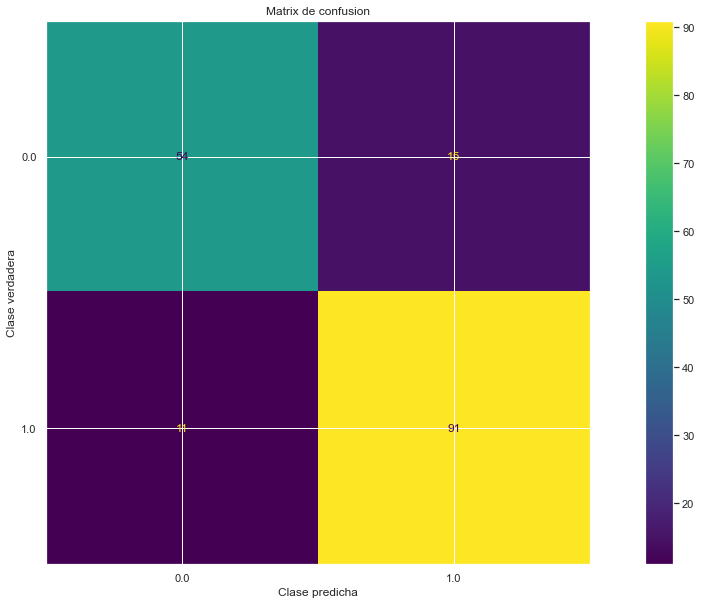


              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81        69
         1.0       0.86      0.89      0.88       102

    accuracy                           0.85       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.85      0.85      0.85       171

Modelo SVM


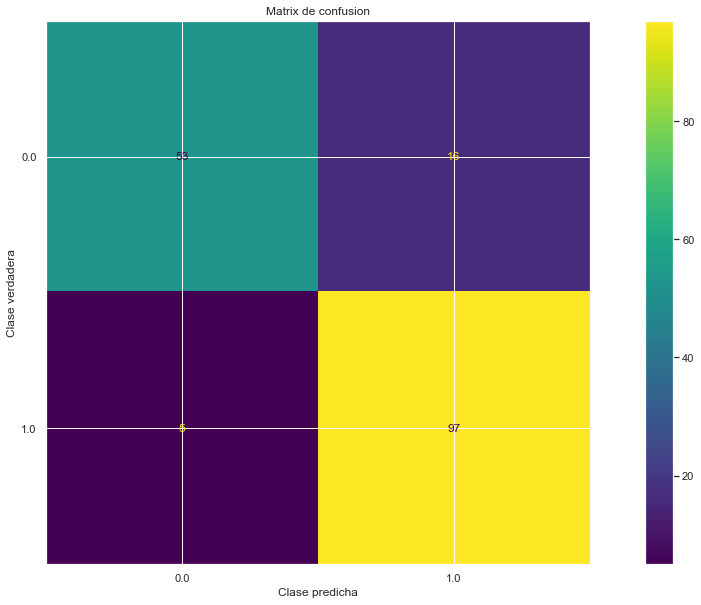


              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        69
         1.0       0.86      0.95      0.90       102

    accuracy                           0.88       171
   macro avg       0.89      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171

Resumen de los modelos
  name  roc_auc promedio  Std Promedio
0   LR          0.960687      0.031824
1  LDA          0.973714      0.017983
2  KNN          0.935762      0.040087
3   DT          0.902690      0.037071
4   NB          0.935212      0.047566
5  SVM          0.956096      0.039060


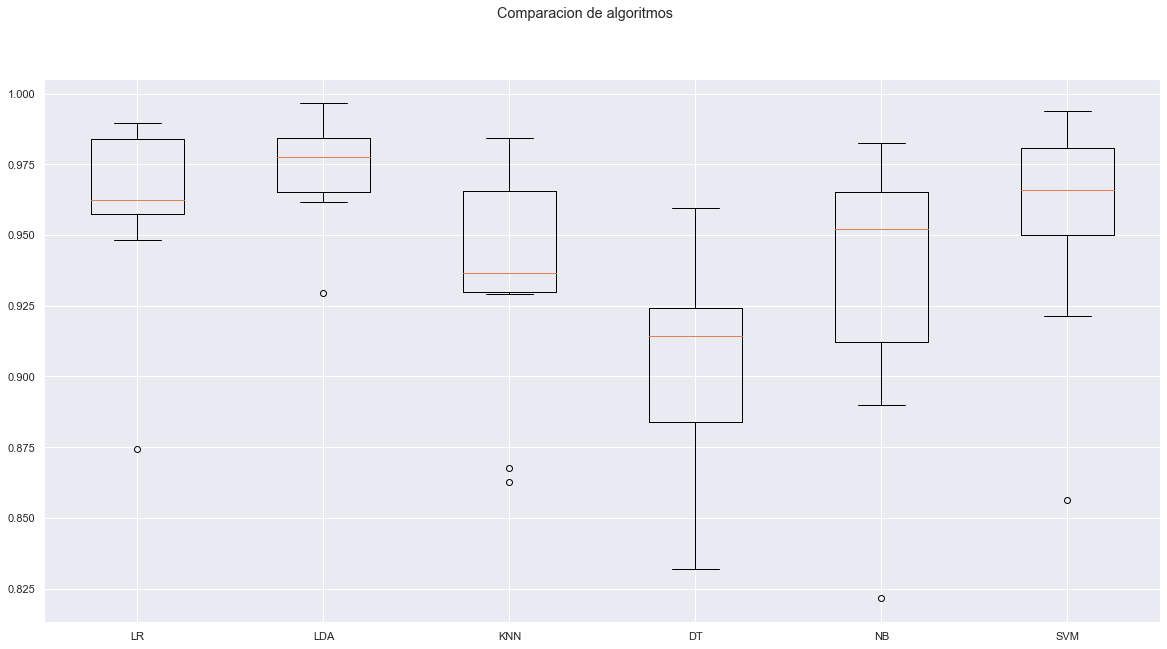

In [28]:
# Vamos a probar los modelos solo con los valores promedio
df_mean_values = df.iloc[:,:10]
df_mean_values['malignant'] = df['malignant']
X, Y = transform_data(df_mean_values)
df_results = evaluate_models(X,Y)

### Al tener bastantes caracteristicas en el Dataset, vamos a utilizar estrategias de Feature Engineering para mejorar/mantener el performance de nuestros modelos y utilizar menos variables

In [29]:
# Al ser un problema donde los datos de entrada son numericos y la salida es categorica (0,1), vamos a utilizar la metrica ANOVA F
fs = SelectKBest(score_func=f_classif)
# apply feature selection
X, Y = transform_data(df)
X_selected = fs.fit_transform(X, Y)
X_selected.shape


(569, 10)

Modelo LR


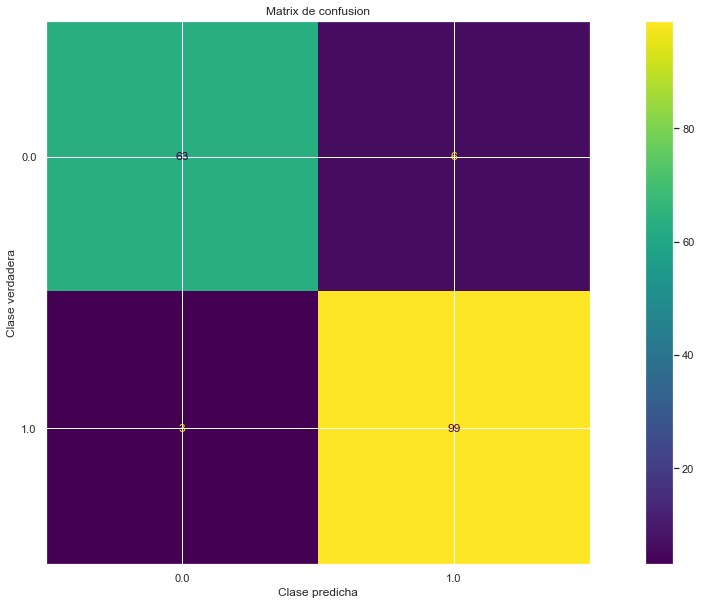


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        69
         1.0       0.94      0.97      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Modelo LDA


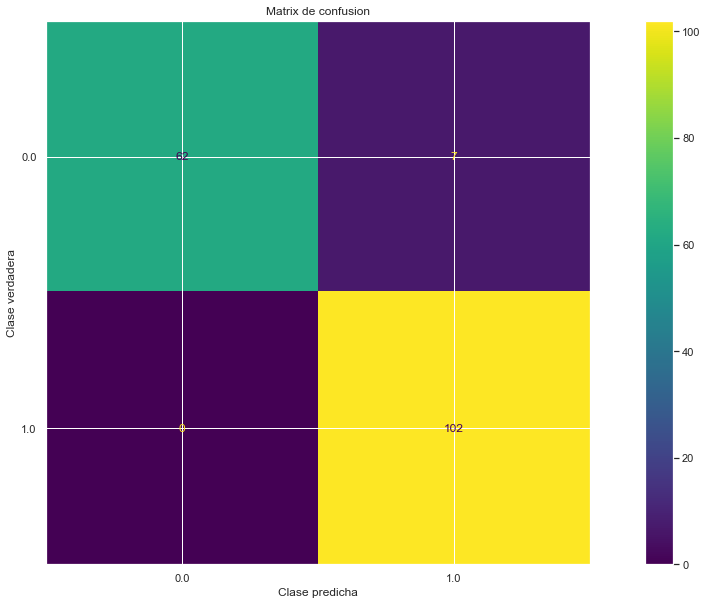


              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        69
         1.0       0.94      1.00      0.97       102

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Modelo KNN


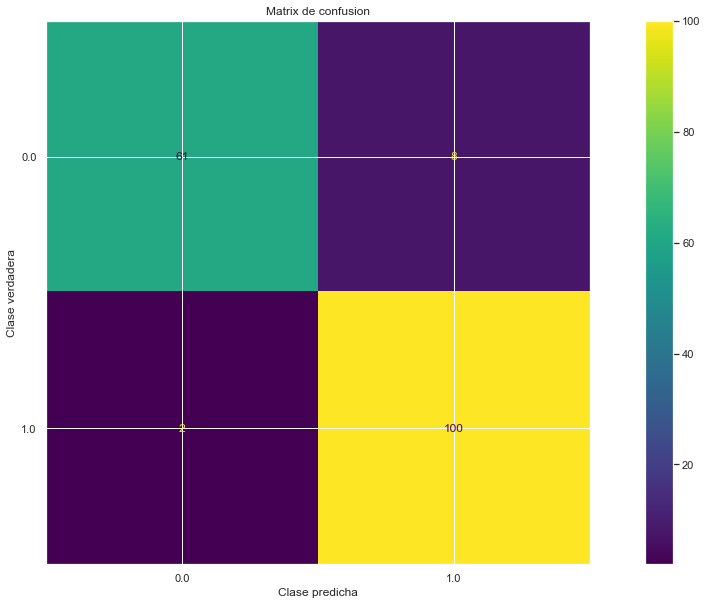


              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        69
         1.0       0.93      0.98      0.95       102

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Modelo DT


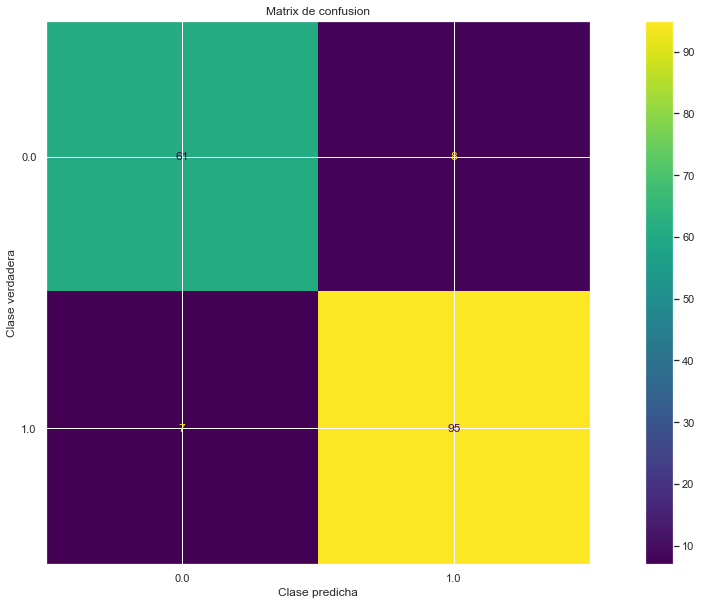


              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        69
         1.0       0.92      0.93      0.93       102

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171

Modelo NB


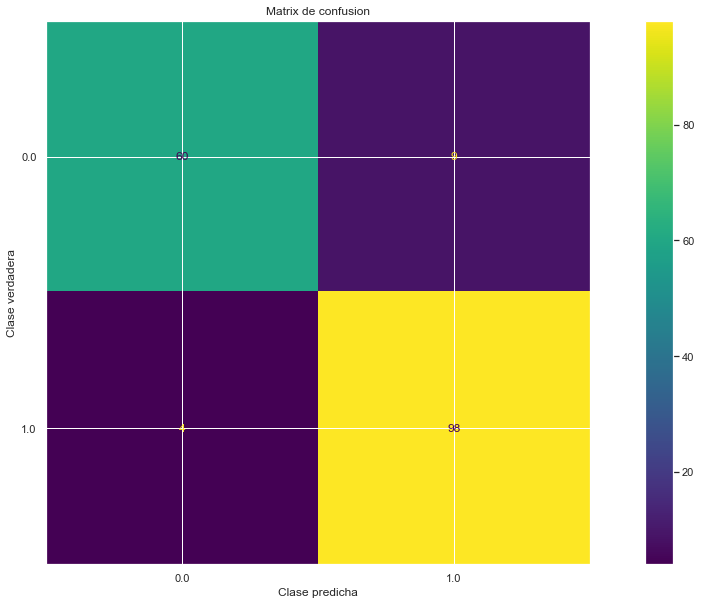


              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90        69
         1.0       0.92      0.96      0.94       102

    accuracy                           0.92       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

Modelo SVM


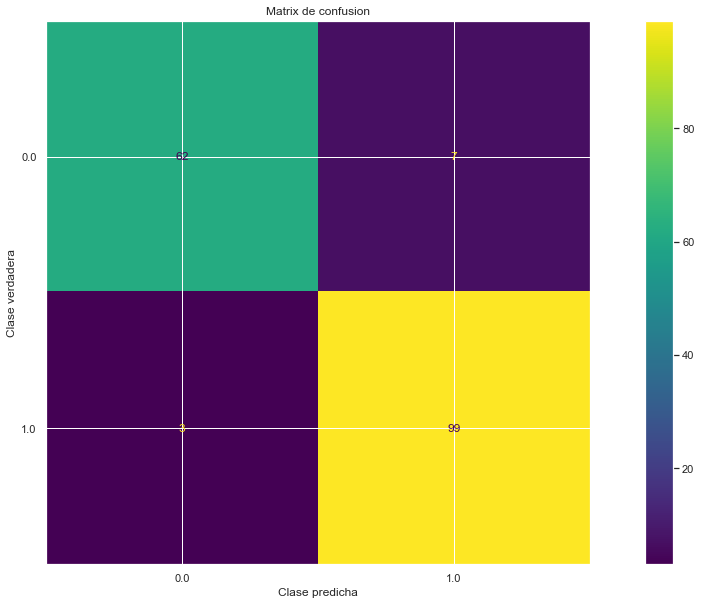


              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        69
         1.0       0.93      0.97      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Resumen de los modelos
  name  roc_auc promedio  Std Promedio
0   LR          0.988615      0.017212
1  LDA          0.989446      0.011966
2  KNN          0.967211      0.041653
3   DT          0.934690      0.032339
4   NB          0.975241      0.030281
5  SVM          0.987900      0.017807


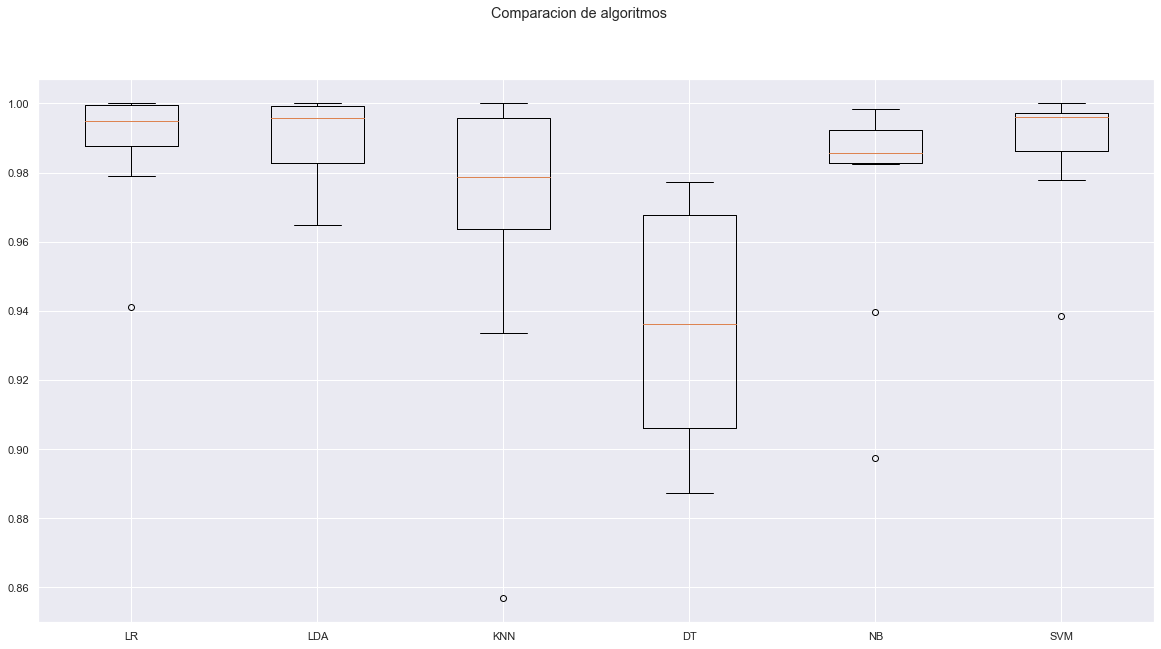

In [30]:
df_results = evaluate_models(X_selected,Y)

### Podemos darnos cuenta que las metricas mejoraron un poco cuando se utilizo una tecnica de Feature Selection, por lo que nos quedaremos con este Dataset para la siguiente etapa, la cual consta de seleccionar los algoritmos de mayor accuracy y tratar de optimizar los hiperparametros de estos

In [31]:
# Seleccionamos los modelos
df_results[df_results['roc_auc promedio'] >= df_results['roc_auc promedio'].mean()]

,name,roc_auc promedio,Std Promedio
0,LR,0.988615,0.017212
1,LDA,0.989446,0.011966
4,NB,0.975241,0.030281
5,SVM,0.987900,0.017807


In [32]:
def model_tunning(model, grid, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
    grid_result = grid_search.fit(X_selected,Y)
    print("Mejor Roc AUC: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

In [33]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01] # fuerza de la regularizacion
grid = dict(solver=solvers,penalty=penalty,C=c_values)
model_tunning(model, grid, X_selected, Y)

Mejor Roc AUC: 0.992133 usando {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [34]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid'] # funcion para crear el hiperplano que separa los datos
C = [50, 10, 1.0, 0.1, 0.01] # fuerza de regularizacion
gamma = ['scale'] # que tanta influencia tienen los puntos a la hora de crear el hiperplano
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
model_tunning(model, grid, X_selected, Y)

Mejor Roc AUC: 0.990410 usando {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [35]:
model = GaussianNB()
var_smoothing = list(np.logspace(0,-9, num=100)) # es un cálculo de estabilidad para ampliar (o suavizar) la curva y, por lo tanto, tener en cuenta más muestras que están más alejadas de la media de la distribución.
grid = dict(var_smoothing=var_smoothing)
model_tunning(model, grid, X_selected, Y)

Mejor Roc AUC: 0.975310 usando {'var_smoothing': 1.0}


In [36]:
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen'] # ‘svd’: Singular value decomposition (default), ‘lsqr’: Least squares solution. ‘eigen’: Eigenvalue decomposition.
grid = dict(solver=solver)
model_tunning(model, grid, X_selected, Y)

Mejor Roc AUC: 0.988718 usando {'solver': 'svd'}


### Con esto, podemos darnos cuenta que el modelo con mejor rendimiento en funcion del ROC AUC es una **Regresion Logistica**